In [121]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
import numpy as np
import os

In [122]:
od_deaths = pd.read_csv('data/opiate_deaths.csv', dtype={'INJURY_FIPS':str})

injury_year =  pd.to_datetime(od_deaths['INJURY_DATE'], format='%m/%d/%Y')
od_deaths['injury_year'] = pd.DatetimeIndex(injury_year).year
od_deaths['injury_year'] = od_deaths['injury_year'].astype(str)
od_deaths['injury_year'] = od_deaths['injury_year'].str.replace('.0','',regex=False)

### Let's make a map!

First let's prepare the data.

In [123]:
#Read in our shapefile of Minnesota counties
mn_cnty = gpd.read_file('gis/tl_2015_mn_county/tl_2015_mn_county.shp')

#Group our overdose death data by county FIPS code
by_cnty = od_deaths.groupby('INJURY_FIPS')['STATEID'].count()

#join death data to shapefile
geo_deaths = mn_cnty.merge(by_cnty, left_on='GEOID', right_on='INJURY_FIPS', how='left')

#rename our ambiguous column name
geo_deaths = geo_deaths.rename(columns={'STATEID':'od_deaths'})

#fill all counties without any death data with zeros
geo_deaths = geo_deaths.fillna(value={'od_deaths': 0})

#fix our map projection so it looks prettier
geo_deaths = geo_deaths.to_crs('EPSG:3395')

/Users/akanik/.virtualenvs/teaching-guide-data-cleaning-and-viz-with--Yo5GS_kn/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Now let's make the map.

JenksCaspall            

    Interval       Count
------------------------
[  0.00,   1.00] |    19
(  1.00,   8.00] |    33
(  8.00,  19.00] |    13
( 19.00,  74.00] |    18
( 74.00, 550.00] |     4


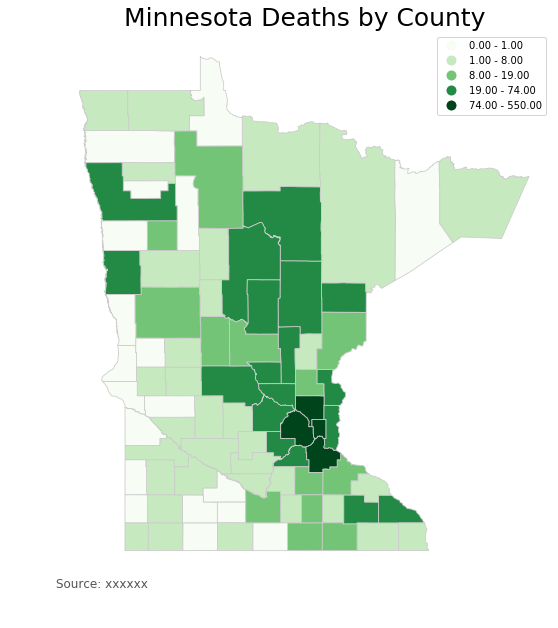

In [124]:
vmin = geo_deaths.od_deaths.min()
vmax = geo_deaths.od_deaths.max()
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')

# add a title
ax.set_title('Minnesota Deaths by County', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: xxxxxx', xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

#This bit tells us how many counties are in each bucket
print(mapclassify.JenksCaspall(geo_deaths.od_deaths, k=5))

#This bit actually builds the map
geo_deaths.plot(column='od_deaths', cmap='Greens', linewidth=0.8, ax=ax, 
               edgecolor='0.8', scheme='JenksCaspall', legend=True)

We can save this as a png also.

In [125]:
fig.savefig('img/minnesota-od-map.png', dpi=300)

### Let's make some small multiples to see how things have changed overtime.

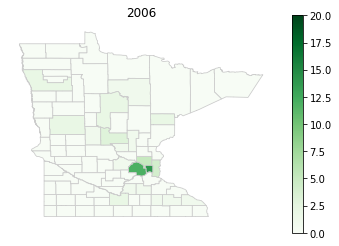

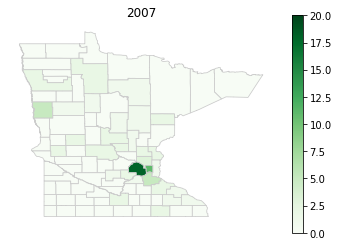

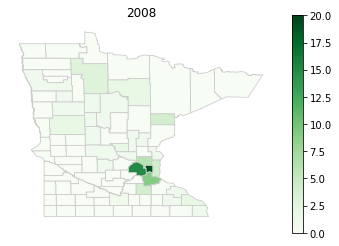

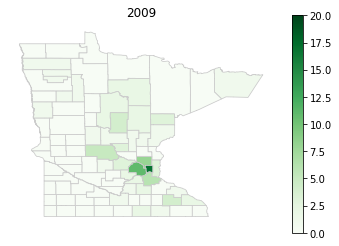

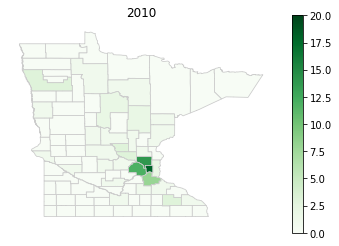

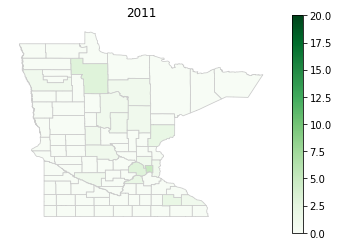

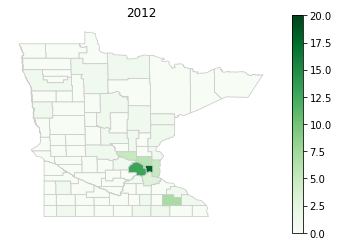

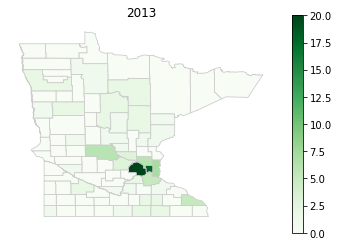

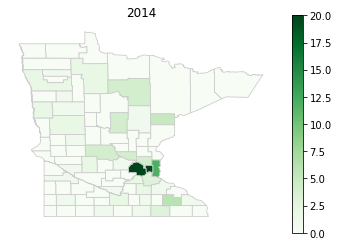

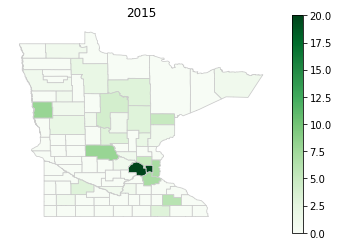

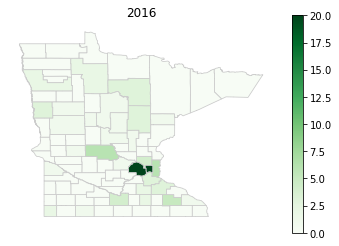

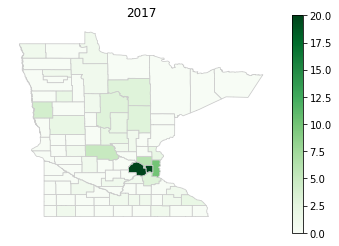

In [118]:
#years as a list
year_list = ['2006','2007','2008','2009','2010','2011',
             '2012','2013','2014','2015','2016','2017']

by_yearcnty = pd.pivot_table(od_deaths, values='STATEID', index='INJURY_FIPS',
                            columns=['injury_year'], aggfunc='count').reset_index()

yr_geodeaths = mn_cnty.merge(by_yearcnty, left_on='GEOID', right_on='INJURY_FIPS', how='left')

yr_geodeaths = yr_geodeaths.fillna({'2006':0,'2007':0,'2008':0,'2009':0,'2010':0,
                                   '2011':0,'2012':0,'2013':0,'2014':0,'2015':0,
                                   '2016':0,'2017':0})

vmin, vmax = 0, 20

for year in year_list:
    fig = yr_geodeaths.plot(column=year, cmap='Greens', linewidth=0.8, vmin=vmin, 
                           vmax=vmax, edgecolor='0.8',legend=True, 
                            norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    fig.axis('off')
    
    fig.set_title(year, fontdict={'fontsize': '12', 'fontweight' : '3'})
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join('img', year+'_od_deaths.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

<module 'matplotlib.pyplot' from '/Users/akanik/.virtualenvs/teaching-guide-data-cleaning-and-viz-with--Yo5GS_kn/lib/python3.7/site-packages/matplotlib/pyplot.py'>

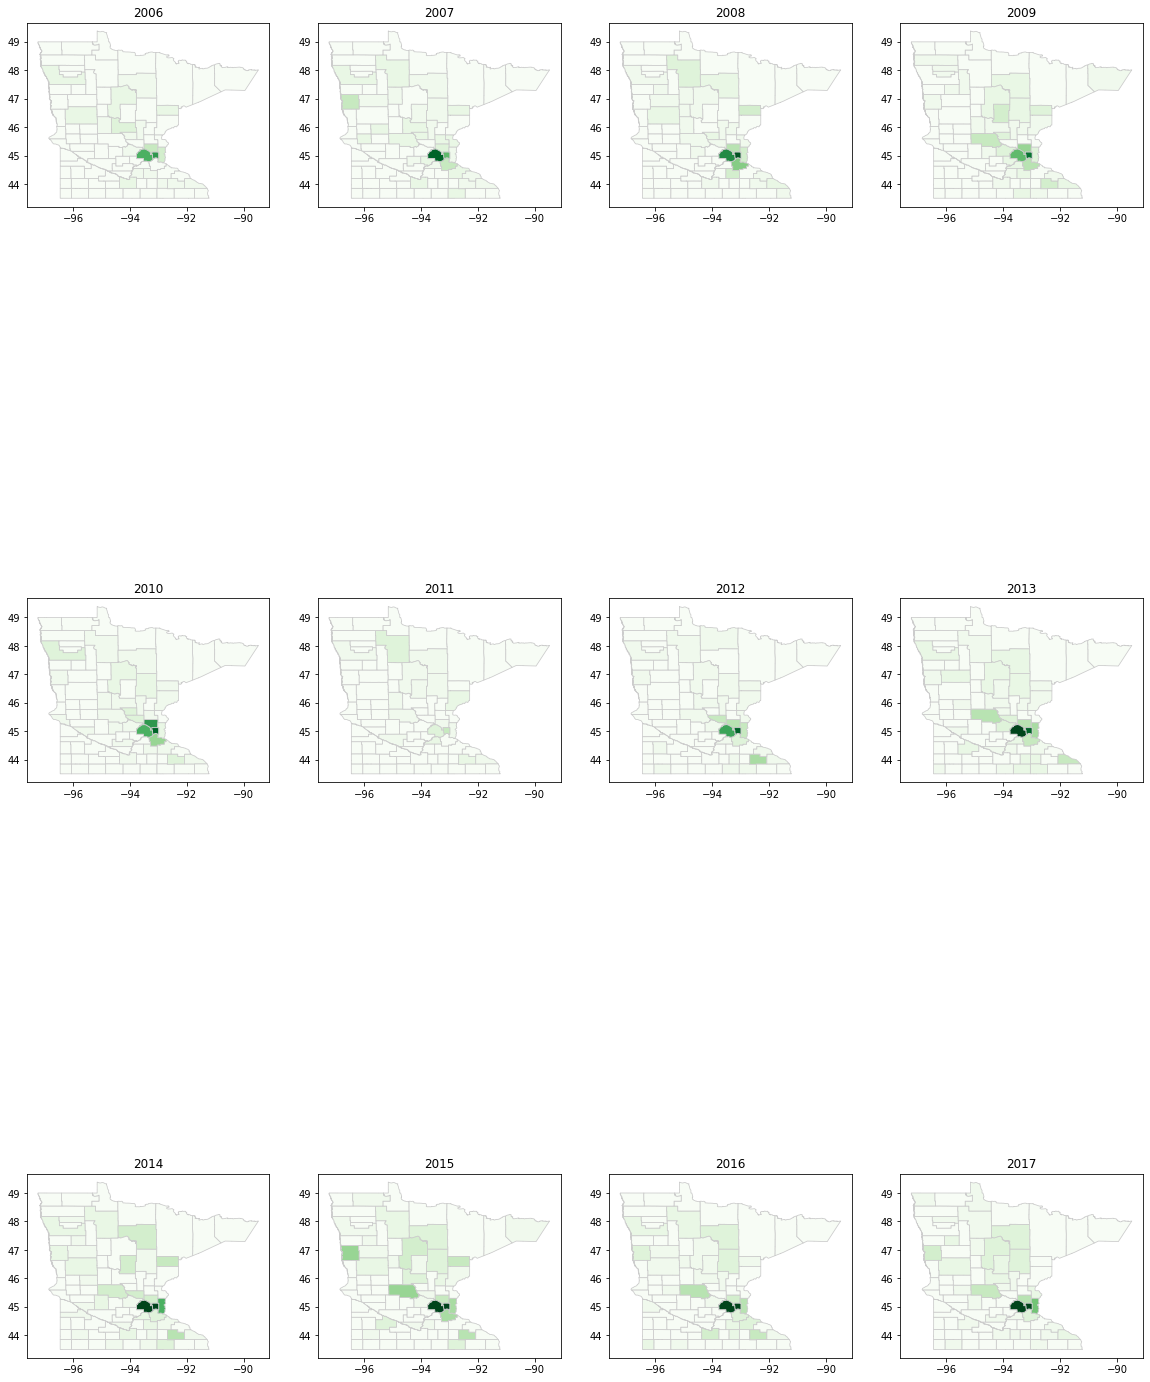

In [130]:
#years as a list
year_list = ['2006','2007','2008','2009','2010','2011',
             '2012','2013','2014','2015','2016','2017']

by_yearcnty = pd.pivot_table(od_deaths, values='STATEID', index='INJURY_FIPS',
                            columns=['injury_year'], aggfunc='count').reset_index()

yr_geodeaths = mn_cnty.merge(by_yearcnty, left_on='GEOID', right_on='INJURY_FIPS', how='left')

yr_geodeaths = yr_geodeaths.fillna({'2006':0,'2007':0,'2008':0,'2009':0,'2010':0,
                                   '2011':0,'2012':0,'2013':0,'2014':0,'2015':0,
                                   '2016':0,'2017':0})


plt.figure(figsize=(20,30), facecolor='white')

plot_number = 1
for year in year_list:
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(3, 4, plot_number)
    vmin = 0#yr_geodeaths[year].min
    vmax = 20#yr_geodeaths[year].max
    
    yr_geodeaths.plot(column=year, cmap='Greens', linewidth=0.8, vmin=vmin, 
                      vmax=vmax, edgecolor='0.8',ax=ax, legend=False)
    
    #fig.axis('off')
    
    ax.set_title(year, fontdict={'fontsize': '12', 'fontweight' : '3'})
    plot_number = plot_number + 1
plt
    